In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargamos los datos con pandas
dataset = pd.read_csv("crime_data.csv")
dataset.head()


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
col_names = list(dataset.columns)
col_names.remove('State')
X = dataset[col_names]

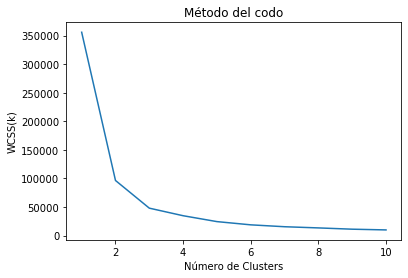

In [5]:
# Método del codo para averiguar el número óptimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()


In [21]:
#número ideal de cluster es igual a 3;  parece el optimo por el método del codo (a partir del tercero la reducción de dispersión por un cluster adicional es pequeña)

# Aplicar el método de k-means para segmentar el data set
kmeans = KMeans(n_clusters = 3, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [22]:
# Los centroides 
kmeans.cluster_centers_

array([[  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ]])

In [23]:
#Obtención del listado de Estados pertenecientes a cada cluster

for i in range(max(y_kmeans) + 1):
    print ("Cluster", i)
    print (dataset["State"][y_kmeans == i])

Cluster 0
6       Connecticut
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
34             Ohio
37     Pennsylvania
40     South Dakota
43             Utah
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object
Cluster 1
3          Arkansas
5          Colorado
9           Georgia
20    Massachusetts
24         Missouri
29       New Jersey
35         Oklahoma
36           Oregon
38     Rhode Island
41        Tennessee
42            Texas
45         Virginia
46       Washington
49          Wyoming
Name: State, dtype: object
Cluster 2
0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27   